In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

/Users/yutotakagi/Develop/ass-ds-exercises/.venv/lib/python3.11/site-packages/pmdarima/compat/sklearn.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [3]:
DRAFT_DATA = "../data/tsa_外国人人口.csv"
DIFF_DATA = "../data/trim_diff.csv"

dr_df = pd.read_csv(DRAFT_DATA)
diff_df = pd.read_csv(DIFF_DATA)

In [4]:
series = dr_df["総数_新宿区"]

model = auto_arima(
    series,
    seasonal=False,     # 年次なので季節性なし
    d=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=823.022, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=819.742, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=818.304, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.069, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=820.503, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=820.559, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=822.952, Time=0.00 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.094 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -406.152
Date:                Fri, 31 Oct 2025   AIC                       

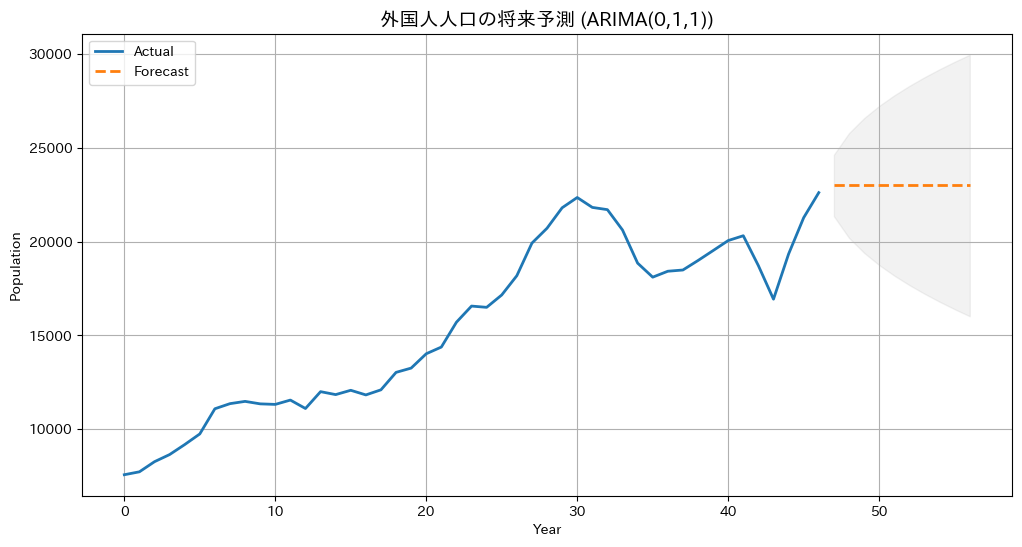

In [ ]:
model = SARIMAX(series, order=(0,1,1))
results = model.fit()

n_steps = 10
forecast = results.get_forecast(steps=n_steps)
pred_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(series, label="Actual", linewidth=2)
plt.plot(forecast.predicted_mean, label="Forecast", linestyle="--", linewidth=2)

plt.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="gray",
    alpha=0.1
)

plt.title("外国人人口の将来予測 (ARIMA(0,1,1))", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.legend()
plt.show()